In [2]:
#Importing all the needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
dataset = pd.read_csv("D:/Programming/CAP CODE/barley.csv")
dataset.dataframeName = 'barley.csv'

In [4]:
print("Before Removing # col")
print(dataset.head())
print("After Removing # col")
del dataset["#"]
print(dataset.head())

Before Removing # col
   #    h   t  vol
0  1  488  18  1.2
1  2  480  18  1.3
2  3  475  17  1.4
3  4  470  18  1.5
4  5  463  20  1.7
After Removing # col
     h   t  vol
0  488  18  1.2
1  480  18  1.3
2  475  17  1.4
3  470  18  1.5
4  463  20  1.7


In [5]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


## Sensors readings 

<ipython-input-5-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


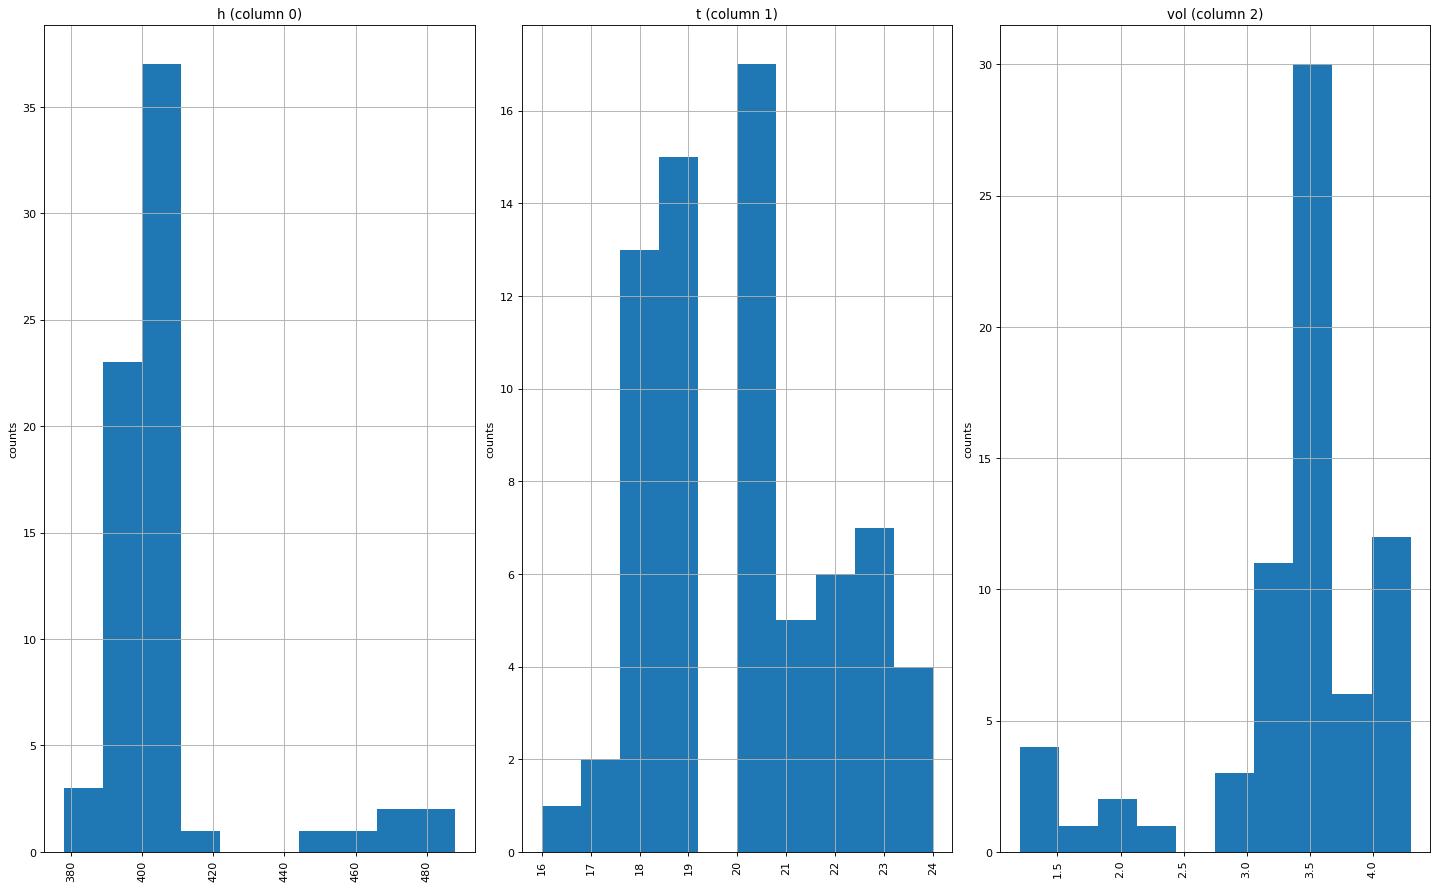

In [6]:
plotPerColumnDistribution(dataset, 10, 5)

In [7]:
def plotCorrelationMatrix(dataset, graphWidth):
    filename = dataset.dataframeName
    dataset = dataset.dropna('columns') # drop columns with NaN
    dataset = dataset[[col for col in dataset if dataset[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if dataset.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({dataset.shape[1]}) is less than 2')
        return
    corr = dataset.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

## Correlation Matrix

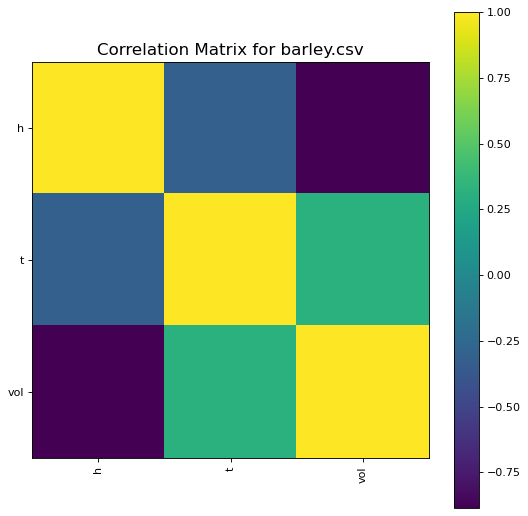

In [8]:
plotCorrelationMatrix(dataset, 8)

In [9]:
X = dataset.iloc[:, 1:2]
y = dataset.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [10]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Scatter Plot between Temp. and Humidity

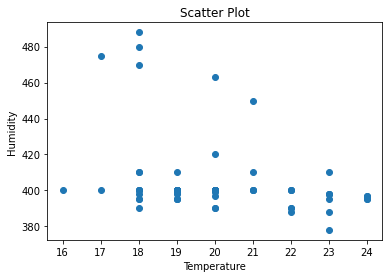

In [15]:
temp = dataset.iloc[: , 1:2]
humidity = dataset.iloc[: , 0:1]
plt.scatter(temp, humidity)
plt.title('Scatter Plot')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

## Mean Error Graph

Text(0, 0.5, 'Mean Error')

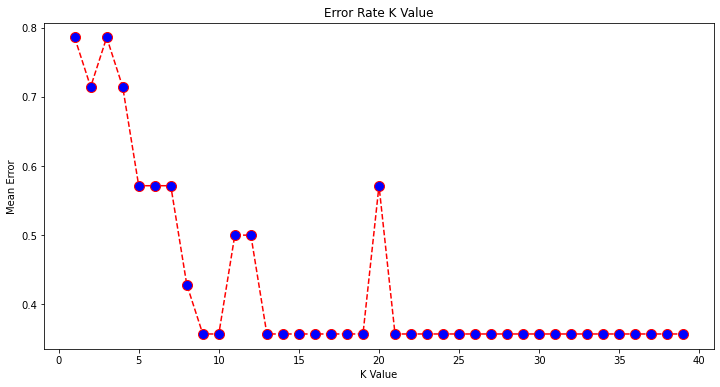

In [16]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Accuracy 

In [17]:
classifier = KNeighborsClassifier(n_neighbors=15, metric="euclidean")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred), 2)*100,"%")

Accuracy is: 64.0 %


## Our expectation for day 36

In [18]:
day36pred = classifier.predict([[18]])
print("Expected Humidity: ",day36pred[0])

Expected Humidity:  395
